<a href="https://colab.research.google.com/github/Kharebova-Irina/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
x_train = x_train.reshape(-1, 32, 32, 3) / 255.
x_test = x_test.reshape(-1, 32, 32, 3) / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 512, epochs = 10)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6160 - loss: 1.0905 - val_accuracy: 0.6475 - val_loss: 1.0152
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6380 - loss: 1.0411 - val_accuracy: 0.6554 - val_loss: 0.9658
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.6640 - loss: 0.9719 - val_accuracy: 0.6872 - val_loss: 0.8858
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6928 - loss: 0.8885 - val_accuracy: 0.7057 - val_loss: 0.8552
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.7112 - loss: 0.8439 - val_accuracy: 0.7066 - val_loss: 0.8364
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7337 - loss: 0.7775 - val_accuracy: 0.7295 - val_loss: 0.7912
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.7445 - loss: 0.7490 - val_accuracy: 0.7320 - val_loss: 0.7684
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7687 - loss: 0.6696 - val_accuracy: 0.7325 - v

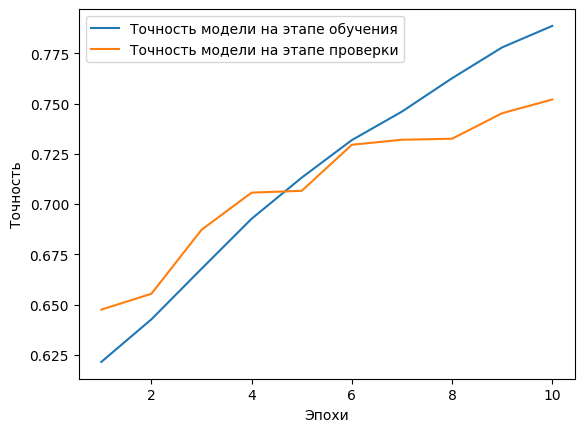

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = np.arange(1, len(acc) + 1)

plt.plot(epochs, acc, label = 'Точность модели на этапе обучения')
plt.plot(epochs, val, label = 'Точность модели на этапе проверки')
plt.legend()
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


np.int64(4)

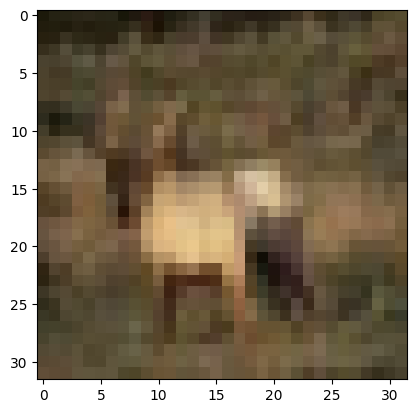

In [ ]:
img = x_train[3]
plt.imshow(img)

img = np.array([img]).reshape((1, 32, 32, 3))
prediction = model.predict(img)
prediction = np.argmax(prediction)
prediction